# TP 1: SVM

## Q1

In [38]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train)
print("Success with a linear kernel :", svc.score(X_test, Y_test) * 100, "%")


Success with a linear kernel : 70.0 %


## Q2

In [76]:
svc = SVC(kernel ="poly", gamma = "scale")
svc.fit(X_train, Y_train)
print("Success with a polynomial kernel :", svc.score(X_test, Y_test) * 100, "%")

Success with a polynomial kernel : 70.0 %


In [82]:
n = 100

poly_scores = []
linear_scores = []
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)
    svc = SVC(kernel = "linear")
    svc.fit(X_train, Y_train)
    linear_scores.append(svc.score(X_test, Y_test))
    svc = SVC(kernel ="poly", gamma = "scale")
    svc.fit(X_train, Y_train)
    poly_scores.append(svc.score(X_test, Y_test))

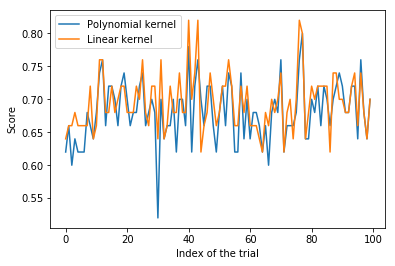

In [86]:
from matplotlib import pyplot as plt

plt.plot(range(n), poly_scores, label = "Polynomial kernel")
plt.plot(range(n), linear_scores, label = "Linear kernel")
plt.xlabel("Index of the trial")
plt.ylabel("Score")
plt.legend()
plt.show()

In [85]:
print("Mean score with polynomial kernel :",sum(poly_scores)/n)
print("Mean score with linear kernel :",sum(linear_scores)/n)

Mean score with polynomial kernel : 0.6813999999999997
Mean score with linear kernel : 0.6949999999999998


The linear kernel seems to perform slightly better in this case.

## Q3

Soit $ w \in H, w_0 \in \mathbb{R}$

Soit $\Xi_i (w,w_0) = [\,[1-y_i(\Phi(x_i)^T w+ w_0)]_+\;; + \infty[$

Soit $\Xi (w,w_0) = \prod_{i=1}^{n} \Xi_i (w,w_0)$

Soit $\xi \in \Xi (w, w_0)$

On peut alors poser $f(w, w_0, \xi) = \frac{1}{2} \|w\|^2 + C\sum_{i=1}^{n} \xi_i.$ 

Le problème primal de la SVM s'écrit alors : $\underset{w \in H, w_0 \in \mathbb{R}, \xi \in \Xi(w, w_0)}{\min}f(w, w_0, \xi) = \underset{w \in H, w_0 \in \mathbb{R}}{\min} \underset{\xi \in \Xi(w, w_0)}{\min}f(w, w_0, \xi)$

(On rappelle que $\min_{a,b} f(a,b) = \min_a \min_b f(a,b) = \min_b \min_a f(a,b)$ )

Or $\forall i, f$ est une fonction croissante de $\xi_i$ (et pour tout $w, w_0, \xi_j (j\ne i)$  fixés).

Soit $\xi_{min} (w, w_0) = (\xi_{{min}_i})_i$ avec $\xi_{min_i}(w, w_0) = [1-y_i(\Phi(x_i)^T w+w_0)]_+$

On peut poser alors $g(w, w_0) = f(w, w_0, \xi_{min}(w, w_0))$. Et le résultat attentu de la question s'écrit : $\underset{w \in H, w_0\in \mathbb{R}}{\min} g(w,w_0)$




On a déjà clairement : $\min_\xi f(w,w_0,\xi) \le f(w,w_0,\xi_{min}) = g(w,w_0)$

Donc $\min_{w,w_0,\xi} f(w,w_0,\xi)\le \min_{w, w_0} g(w,w_0)$. on a obtenu une première inégalité.

De plus on a $\forall$ $w \in H$, $w_0 \in R$, $\xi \in \Xi (w,w_0)$, $f(w, w_0, \xi) \ge f(w, w_0, \xi_{min})$. (Parce que $f$ est croissante de $\xi_i \space \forall i$. Et que tout $\xi_i$ est plus grand que $\xi_{{min}_i}$ par construction de $\xi$)

Donc, $\min_{w,w_0,\xi} f(w,w_0,\xi) \ge min_{w,w_0,\xi} f(w, w_0, \xi_{min}) = \min_{w,w_0} g(w, w_0)$

On a donc la deuxième inégalité. Les deux problèmes sont équivalents.

On notera aussi que trouver $w^*$ et $w_0^*$ dans le second problème, c'est trouver $w^*$, $w_0^*$ et $\xi^*$ dans le premier et vice versa. (ils sont égaux. Et $\xi^* = \xi_{min}(w^*,w_0^*)$)

## Q4

## Q5

In [87]:
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)

In [107]:
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

plot_gallery(lfw_people.images)

TypeError: plot_gallery() missing 1 required positional argument: 'titles'

In [90]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [106]:
lfw_people.images.shape

(1288, 100, 100, 3)

Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.327s
Chance level : 0.6210526315789474
Accuracy : 0.8842105263157894


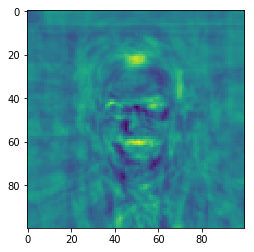

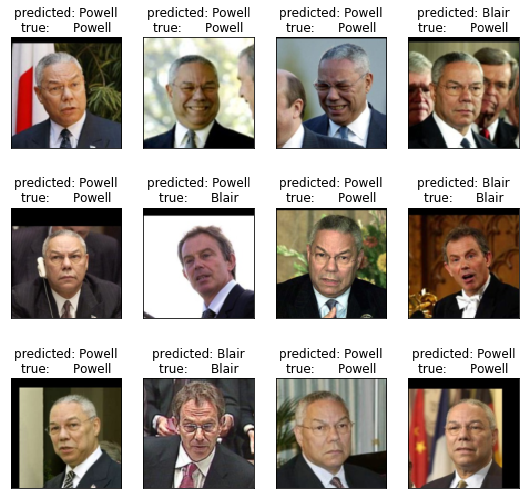

In [112]:
import pylab as pl
from time import time
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(X, y, images, test_size=0.5, random_state=0)


####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()

clf = SVC(kernel = "linear")
clf.fit(X_train, y_train)


print("Predicting the people names on the testing set")
t0 = time()

y_pred = clf.predict(X_test)

print("done in %0.3fs" % (time() - t0))
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test, y_test))

#QUESTION 5 : TODO : try various values for C in the SVC function and plot the error curve

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))

####################################################################
# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()